## SOCIAL NETWORK ADS

#### LOGISTIC REGRESSION / LINEAR REGRESSION

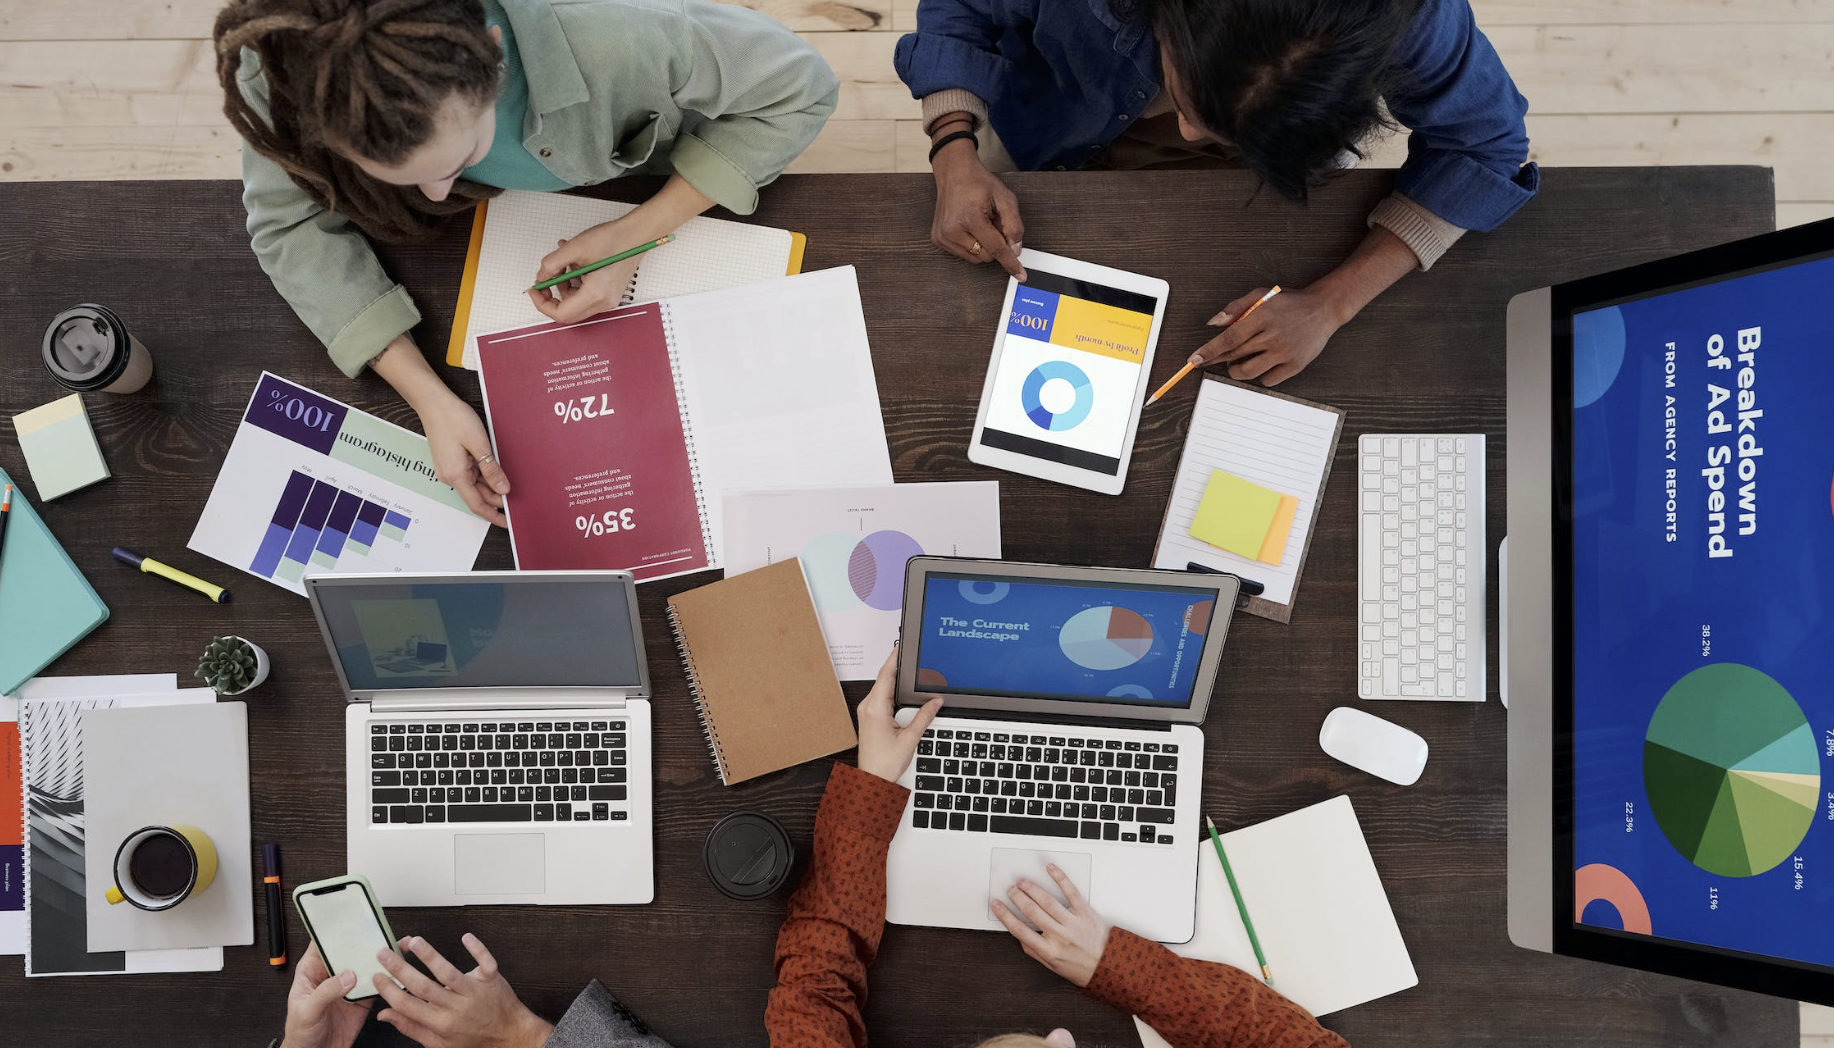

Hemant Thapa

### IMPORTING LIBRARIES

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### LOADING DATASET

In [128]:
df = pd.read_csv('Social_Network_Ads.csv')

In [129]:
df.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

### CHECKING NULL VALUES

In [130]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### CHECKING COLUMNS

In [131]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### CHECKING DATA TYPES

In [132]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### CHECKING CUSTOMER DEMOGRAPHIC

### 1. Maximum Age Frequency

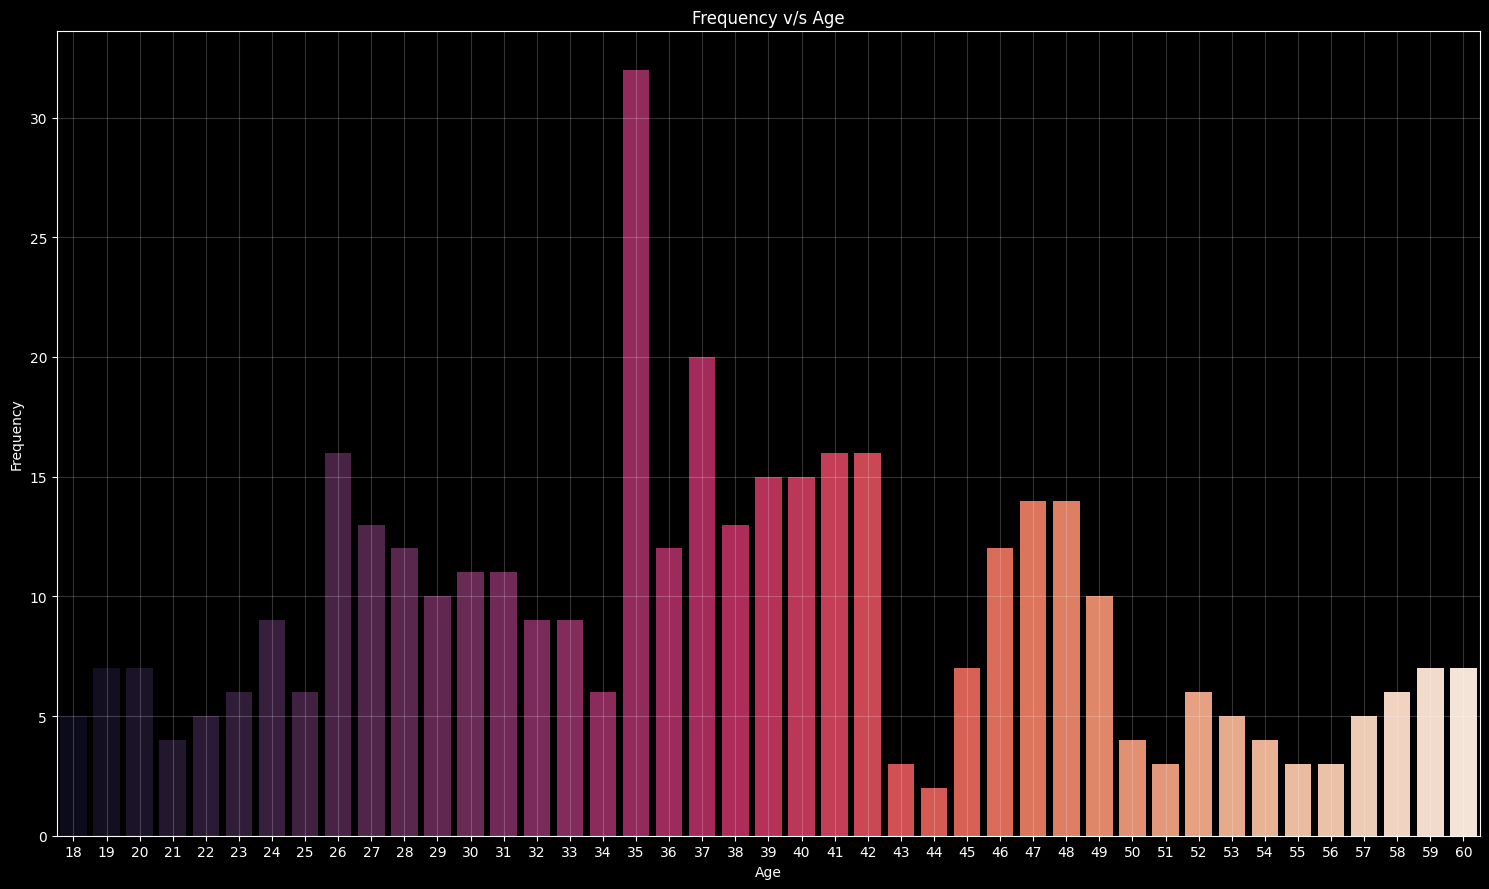

In [133]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
sns.countplot(x="Age", data=df, palette='rocket')
plt.title('Frequency v/s Age')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

We have Maximum age group 35, which are nearly above 30 customers and Minimum age group of 44 below 5 people on dataset

#### 2. Gender Comparision

In [134]:
male_count = []
female_count = []
for i in df.Gender:
    if i == "Male":
        i = +1
        male_count.append(i)
    else:
        i = +1
        female_count.append(i)

In [135]:
sum(male_count)

196

In [136]:
sum(female_count)

204

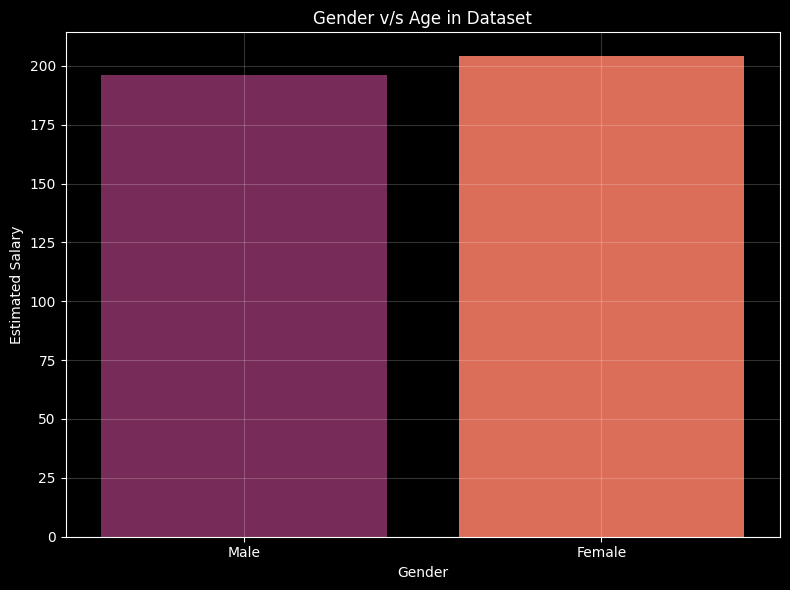

In [137]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.countplot(x="Gender", data=df, palette='rocket')
plt.title('Gender v/s Age in Dataset')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

Female Customer are slighlty higher compare to male customer. Female customer are above 204 and male customer are nearly 196.

### 3. Age vs Estimated Salary with Purchased Color Encoded

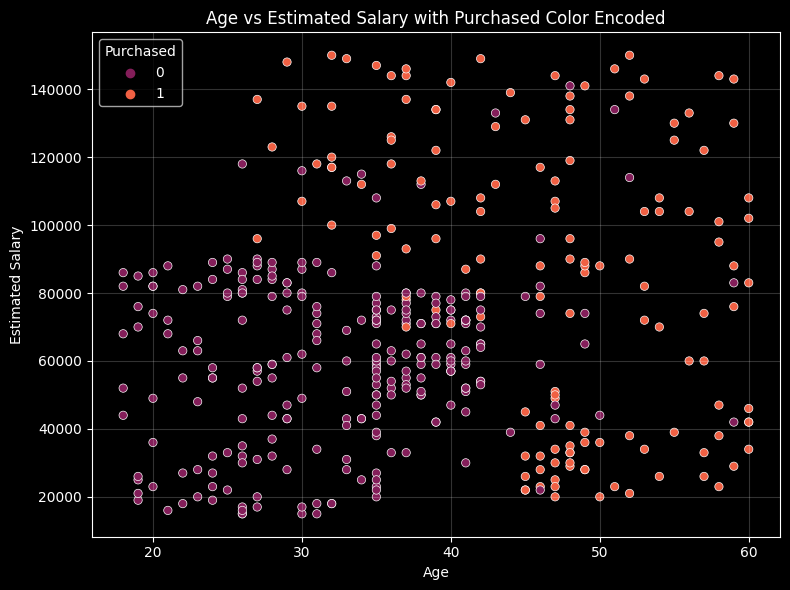

In [138]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette='rocket')
plt.title('Age vs Estimated Salary with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

This graph showcases the demographic of Age and Estimated Salary of customers in a certain dataset. The color encoding of the points indicates whether the customer has purchased a product or not.

### 4. Gender & Purchased Color

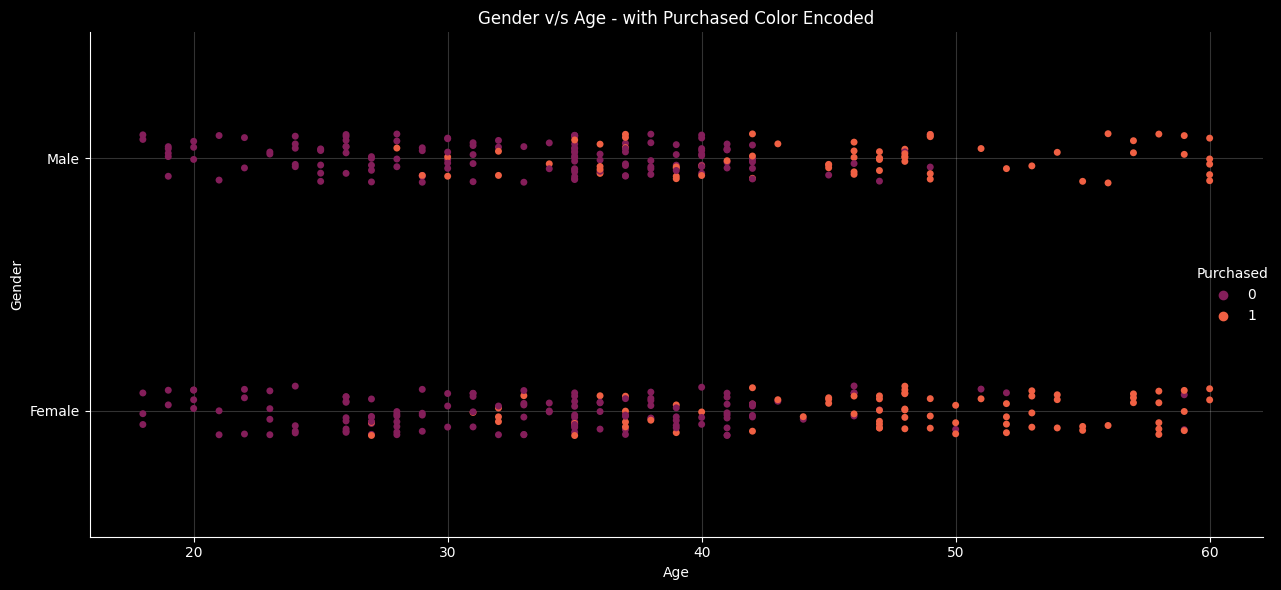

In [139]:
plt.style.use('dark_background')
sns.catplot(x="Age", y="Gender", data=df, hue="Purchased", palette='rocket', height=6,aspect=2)
plt.title('Gender v/s Age - with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### 5. Total Customer purchased and Non - Purchased frequency Chart

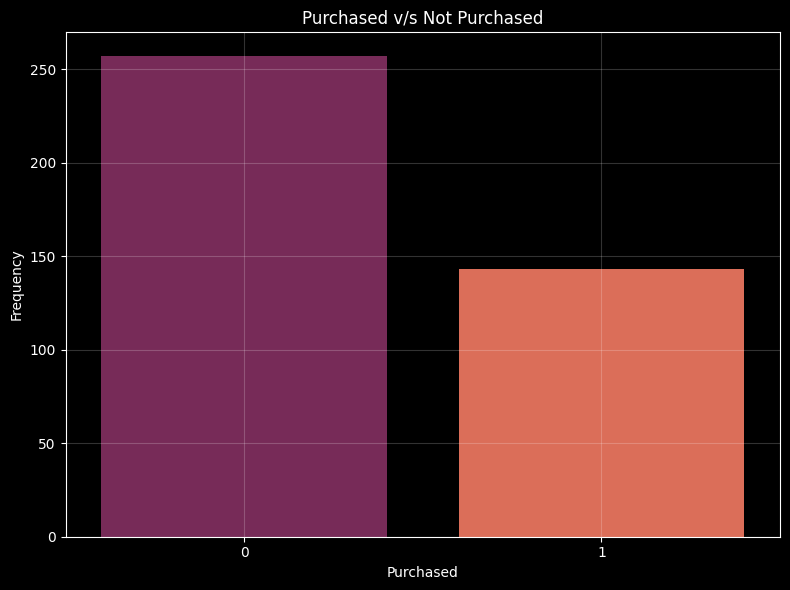

In [144]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.countplot(x="Purchased", data=df, palette='rocket')
plt.title('Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

#### 6. Male and Female Transactions

In [145]:
# Separate the Male and Female columns
male_df = df[df.Gender == "Male"]
female_df = df[df.Gender == "Female"]

In [146]:
male_df.head(2)

User ID Gender  Age  EstimatedSalary  Purchased
0  15624510   Male   19            19000          0
1  15810944   Male   35            20000          0

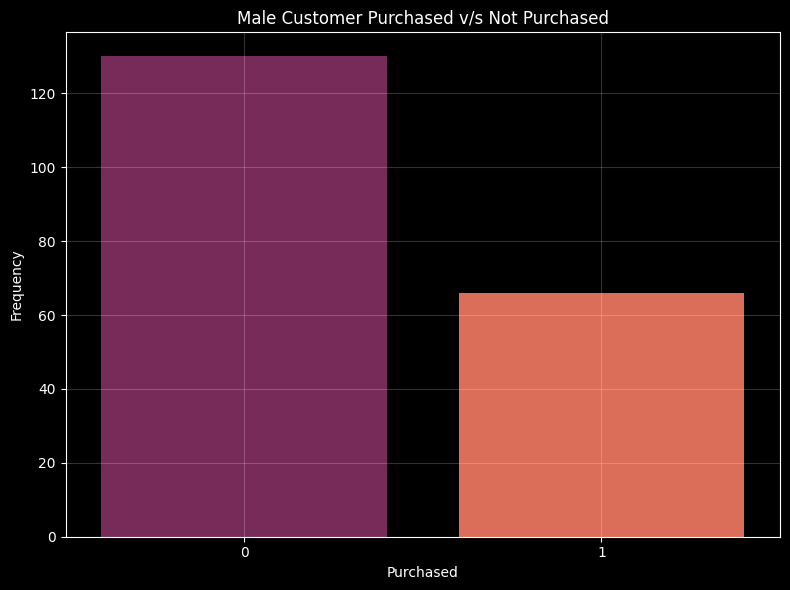

In [149]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.countplot(x="Purchased", data=male_df, palette='rocket')
plt.title('Male Customer Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

In [147]:
female_df.head(2)

User ID  Gender  Age  EstimatedSalary  Purchased
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0

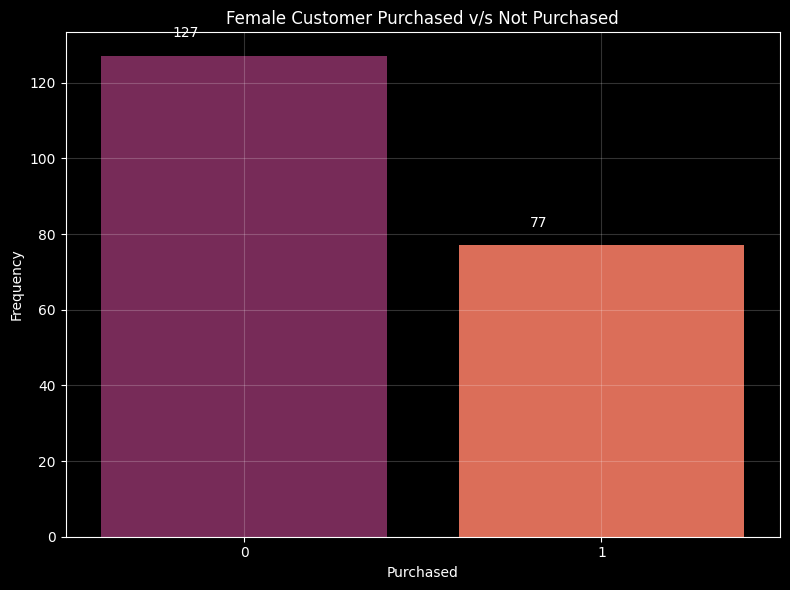

In [157]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.countplot(x="Purchased", data=female_df, palette='rocket')
for i in range(len(female_df['Purchased'].value_counts())):
    count = female_df['Purchased'].value_counts()[i]
    label = str(count)
    plt.annotate(label, (i-0.2, count+5), color='white')

plt.title('Female Customer Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### TRAIN TEST & SPLIT

In [8]:
x = df[['Age', 'EstimatedSalary']].values
y = df['Purchased']

In [9]:
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [10]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size=0.20, random_state=0)

### TEST DATASET

In [12]:
print(test_x.shape)
print(test_y.shape)

(80, 2)
(80,)


### TRAIN DATASET

In [13]:
print(train_x.shape)
print(train_y.shape)

(320, 2)
(320,)


### FEATURE SCALING

In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
x_train = scaler.fit_transform(train_x)
x_test = scaler.fit_transform(test_x)

In [16]:
x_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [17]:
x_test[:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

### LOGISTIC REGRESSION MODEL

In [18]:
# Train the logistic regression model
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(x_train, train_y)

LogisticRegression(max_iter=10000, random_state=0)

In [19]:
# Make predictions on the test set
clf_predictions = clf.predict(x_test)

In [20]:
clf_predictions[:5]

array([0, 0, 0, 0, 0])

In [21]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, clf_predictions)
print("Accuracy:", f'{accuracy*100}%')

Accuracy: 88.75%


### LINEAR REGRESSION MODEL

In [208]:
x = df.Age.values.reshape(-1,1)

In [209]:
x.shape

(400, 1)

In [210]:
x[:5]

array([[19],
       [35],
       [26],
       [27],
       [19]])

In [211]:
y = df.EstimatedSalary

In [212]:
y.shape

(400,)

In [213]:
y[:5]

0    19000
1    20000
2    43000
3    57000
4    76000
Name: EstimatedSalary, dtype: int64

In [214]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size=0.20, random_state=0)

In [216]:
print(train_x.shape)
print(train_y.shape)

(320, 1)
(320,)


In [217]:
print(test_x.shape)
print(test_y.shape)

(80, 1)
(80,)


In [215]:
reg = LinearRegression()

In [218]:
reg.fit(train_x,train_y)

LinearRegression()

In [220]:
y_pred = reg.predict(test_x)

In [221]:
y_pred[:5]

array([65581.69999059, 69812.44068416, 68225.91292407, 65581.69999059,
       68225.91292407])

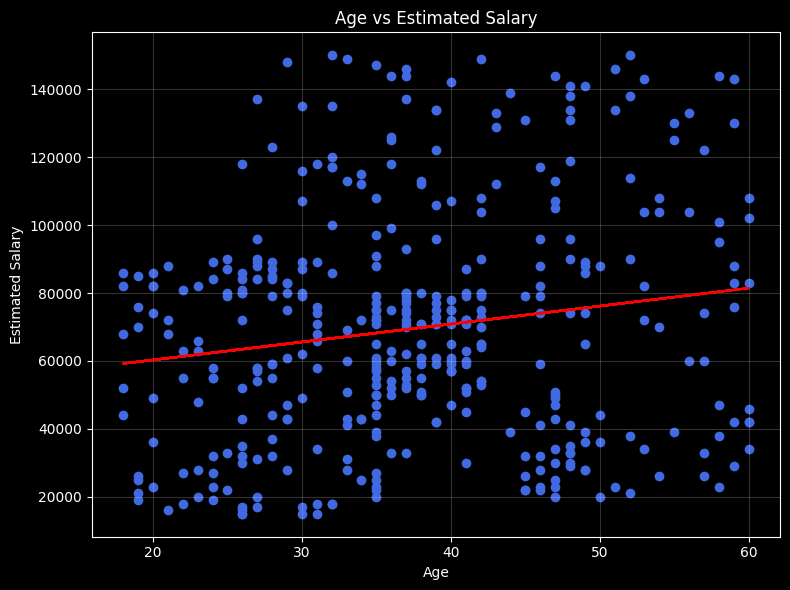

In [223]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.scatter(x,y, color="royalblue")
plt.plot(test_x,y_pred, color="red")
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

#### Salary of the person is increasing according to their age.

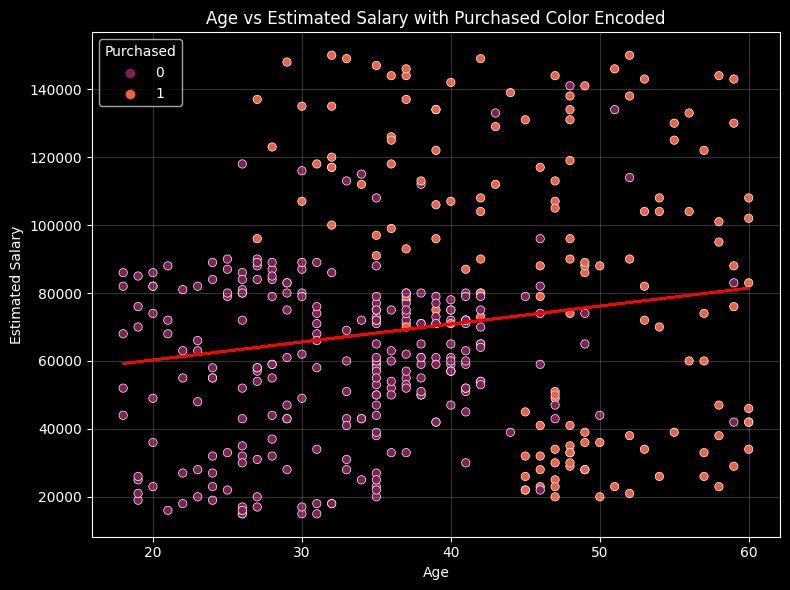

In [224]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette='rocket')
plt.plot(test_x,y_pred, color="red")
plt.title('Age vs Estimated Salary with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()